In [5]:
import numpy as np 
import pandas as pd 
import math 
import os 
import random 


df1 = pd.read_excel("0814_라벨링세트_6주차_병합.xlsx")  
df2 = pd.read_excel("0821_라벨링세트_7주차_병합.xlsx") 

In [6]:
df1.shape, df2.shape

((20930, 15), (26000, 15))

In [8]:
def preprocess(df): 
    df = df.loc[df['라벨링'].notnull(), ['쿼리 번호', '쿼리 문장', '후보 문장', '라벨링']] 
    df = df.dropna() 
    labels_fixed = [] 
    labels = df['라벨링'].values 

    for i in range(len(labels)): 
        if labels[i] == 0.1:
            labels_fixed.append(1.0) 
        elif labels[i] not in [0, 0.5, 0.8, 1.0]:
            labels_fixed.append(None) 
        else:
            labels_fixed.append(labels[i])  

    df['라벨링'] = labels_fixed 
    df = df.dropna() 
    return df 


In [9]:
df1 = preprocess(df1) 
df2 = preprocess(df2) 

In [10]:
df1.head() 

,쿼리 번호,쿼리 문장,후보 문장,라벨링
0,166,an adjustable lens positioned so as to alter ...,Several mechanisms for altering the beam prod...,0.8
1,166,an adjustable lens positioned so as to alter ...,When a plurality of aperture plates are incor...,0.0
2,166,an adjustable lens positioned so as to alter ...,"By deforming the base member 20 in Bailey, th...",0.5
3,166,an adjustable lens positioned so as to alter ...,Beam modifying optics are used to alter the f...,0.8
4,166,an adjustable lens positioned so as to alter ...,For an aperture plate with light refractive o...,1.0


In [11]:
df2.head()

,쿼리 번호,쿼리 문장,후보 문장,라벨링
0,166,an adjustable lens positioned so as to alter ...,Several mechanisms for altering the beam prod...,0.8
1,166,an adjustable lens positioned so as to alter ...,When a plurality of aperture plates are incor...,0.0
2,166,an adjustable lens positioned so as to alter ...,"By deforming the base member 20 in Bailey, th...",0.5
3,166,an adjustable lens positioned so as to alter ...,Beam modifying optics are used to alter the f...,0.8
4,166,an adjustable lens positioned so as to alter ...,For an aperture plate with light refractive o...,1.0


In [12]:
df1.shape, df2.shape

((20916, 4), (25985, 4))

In [14]:
merged = df1.merge(df2, how="right", indicator=True) 
merged 

,쿼리 번호,쿼리 문장,후보 문장,라벨링,_merge
0,166,an adjustable lens positioned so as to alter ...,Several mechanisms for altering the beam prod...,0.8,both
1,166,an adjustable lens positioned so as to alter ...,When a plurality of aperture plates are incor...,0.0,both
2,166,an adjustable lens positioned so as to alter ...,"By deforming the base member 20 in Bailey, th...",0.5,both
3,166,an adjustable lens positioned so as to alter ...,Beam modifying optics are used to alter the f...,0.8,both
4,166,an adjustable lens positioned so as to alter ...,For an aperture plate with light refractive o...,1.0,both
...,...,...,...,...,...
25980,3676,a user interface module to generate the eleme...,"parse an XML-based scene file, the scene file...",0.8,right_only
25981,3676,a user interface module to generate the eleme...,"In addition, the system includes a layout eng...",0.5,right_only
25982,3676,a user interface module to generate the eleme...,"parsing an XML-based scene file, the scene fi...",0.5,right_only
25983,3676,a user interface module to generate the eleme...,"a rendering engine to render, based on the de...",0.5,right_only


In [15]:
test_df = merged[merged['_merge']=='right_only'] 

test_df

,쿼리 번호,쿼리 문장,후보 문장,라벨링,_merge
20916,9492,means for transmitting the selected identifie...,"In step 304, the terminal transmits the secon...",0.5,right_only
20917,9492,means for transmitting the selected identifie...,A further prerequisite for detecting the seco...,0.0,right_only
20918,9492,means for transmitting the selected identifie...,receiving unique cell identifier information ...,0.5,right_only
20919,9492,means for transmitting the selected identifie...,The association is then made by including the...,0.0,right_only
20920,9492,means for transmitting the selected identifie...,The invention also includes a method for mobi...,0.5,right_only
...,...,...,...,...,...
25980,3676,a user interface module to generate the eleme...,"parse an XML-based scene file, the scene file...",0.8,right_only
25981,3676,a user interface module to generate the eleme...,"In addition, the system includes a layout eng...",0.5,right_only
25982,3676,a user interface module to generate the eleme...,"parsing an XML-based scene file, the scene fi...",0.5,right_only
25983,3676,a user interface module to generate the eleme...,"a rendering engine to render, based on the de...",0.5,right_only


In [16]:
assert df1.shape[0] + test_df.shape[0] == df2.shape[0]

/usr/local/lib/python3.9/dist-packages/seaborn/_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:ylabel='count'>

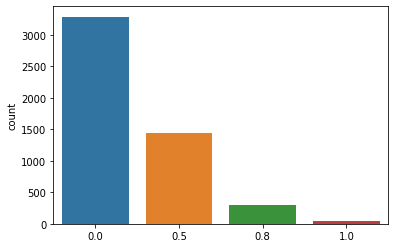

In [21]:
import seaborn as sns
sns.countplot(test_df['라벨링'].values)